# Secondary Exploration

After an initial exploration of the dataset it was clear than some cleaning needed to take place. Now we re-examine the data after cleaning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append("..")
from car_purchase_help.data_processing import format_raw_df, remove_outliers

%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format
plt.style.use('fivethirtyeight')

In [2]:
colors = {'new': 'green', 'like new': 'blue', 'excellent': 'orange', 'good': 'yellow', 'fair': 'red', 'salvage': 'black'}
def plot_odo_price(manufacturer, model, year):
    manu = df[df['manufacturer'] == manufacturer]
    mod = manu[manu['model'] == model]
    modyear = mod[mod['year'] == year].copy()
    modyear.dropna(subset=['condition'], inplace=True)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(f'{manufacturer}, {model} from {year}')
    ax.set_xlabel("Miles on the clock")
    ax.set_ylabel("Price")
    l = []
    c = []
    for cond in modyear.condition.unique():
        modyearcond = modyear[modyear['condition'] == cond]
        l.append(ax.scatter(x=modyearcond['odometer'], y=modyearcond['price'], c=colors[cond]))
        c.append(cond)
    ax.legend(l, c)
    plt.show()
    
def plot_year_price(manufacturer, model):
    manu = df[df['manufacturer'] == manufacturer]
    mod = manu[manu['model'] == model].copy()
    mod.dropna(subset=['condition'], inplace=True)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(f'{manufacturer}, {model}')
    ax.set_xlabel("Year")
    ax.set_ylabel("Price")
    l = []
    c = []
    for cond in mod.condition.unique():
        modcond = mod[mod['condition'] == cond]
        l.append(ax.scatter(x=modcond['year'], y=modcond['price'], c=colors[cond]))
        c.append(cond)
    ax.legend(l, c)
    plt.show()

In [3]:
# https://www.kaggle.com/austinreese/craigslist-carstrucks-data/
df = pd.read_csv(Path('../data/vehicles.csv'))
df = format_raw_df(df)

In [4]:
df.describe()

,price,year,odometer,lat,long
count,"422,338.00","422,338.00","422,338.00","422,338.00","422,338.00"
mean,"146,749.59","2,011.18","99,251.13",38.00,-92.68
std,"19,775,930.60",5.68,"57,844.67",7.70,21.45
min,0.00,"1,981.00","1,001.00",-84.91,-170.29
25%,"4,998.00","2,008.00","50,751.00",34.16,-110.00
50%,"10,900.00","2,012.00","95,210.00",39.11,-87.74
75%,"18,900.00","2,016.00","138,357.25",42.50,-80.71
max,"4,198,286,601.00","2,019.00","299,999.00",84.51,161.02


We see more reasonable statistics in the numerical columns now except for price. It is difficult to put an exact limit on the maximum price. Instead, outliers will be removed once we have restricted the data to a specific make, model and year. Then values outside of 3 standard deviations from the mean will be removed.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422338 entries, 7088746062 to 7082122917
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           422338 non-null  object 
 1   region        422338 non-null  object 
 2   region_url    422338 non-null  object 
 3   price         422338 non-null  int64  
 4   year          422338 non-null  int64  
 5   manufacturer  410748 non-null  object 
 6   model         418669 non-null  object 
 7   condition     252388 non-null  object 
 8   cylinders     273281 non-null  object 
 9   fuel          419503 non-null  object 
 10  odometer      422338 non-null  int64  
 11  title_status  419965 non-null  object 
 12  transmission  418690 non-null  object 
 13  vin           294882 non-null  object 
 14  drive         336234 non-null  object 
 15  size          141680 non-null  object 
 16  type          347452 non-null  object 
 17  paint_color   319154 non-null  obje

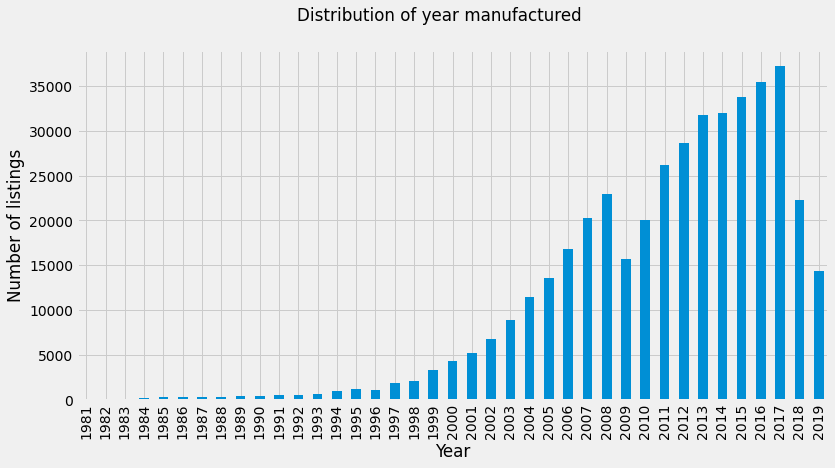

In [6]:
fig = plt.figure(figsize=(12,6))
fig.suptitle("Distribution of year manufactured")
plt.xlabel("Year")
plt.ylabel("Number of listings")
df[df['year'] > 1980]['year'].value_counts().sort_index().plot.bar()

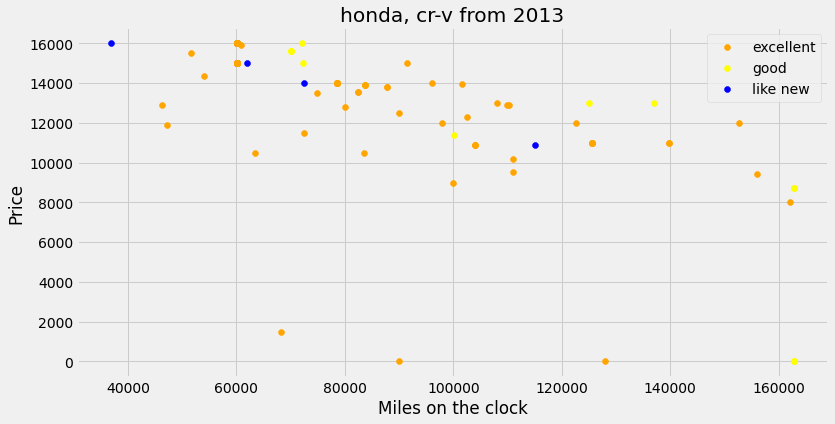

In [7]:
plot_odo_price('honda', 'cr-v', 2013)

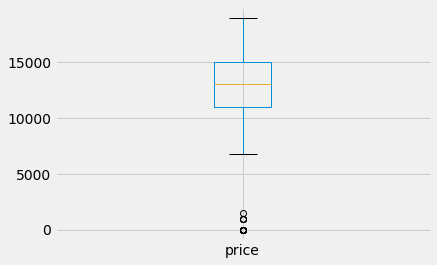

In [8]:
honda = df[df['manufacturer'] == 'honda']
honda_crv = honda[honda['model'] == 'cr-v']
honda_crv_2013 = honda_crv[honda_crv['year'] == 2013]
honda_crv_2013.boxplot(column='price')

In [9]:
honda_crv_2013_no_outliers = honda_crv_2013[((honda_crv_2013['price'] - honda_crv_2013['price'].mean()) / honda_crv_2013['price'].std()).abs() < 3]

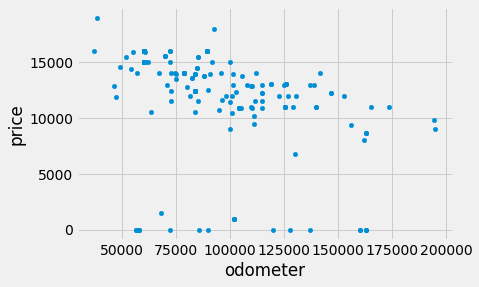

In [10]:
honda_crv_2013_no_outliers.plot.scatter(x='odometer', y='price')

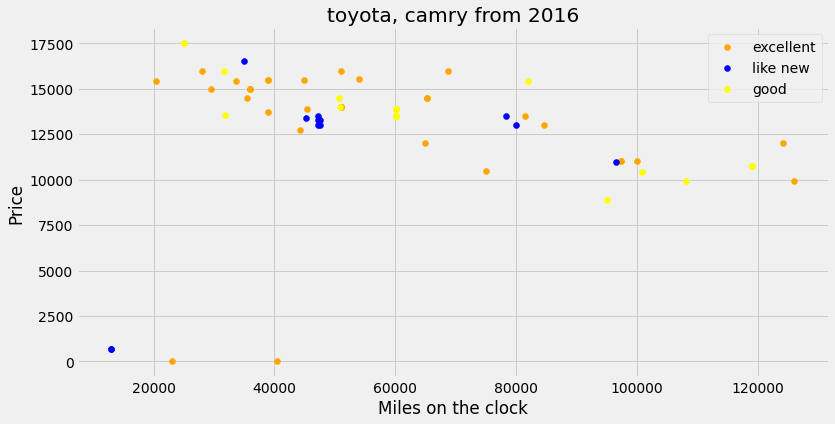

In [11]:
plot_odo_price('toyota', 'camry', 2016)

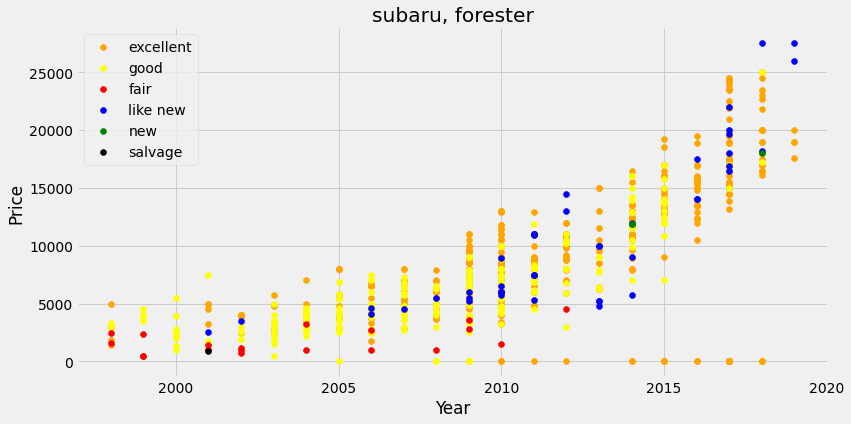

In [12]:
plot_year_price('subaru', 'forester')

In [13]:
subaru_foresters = df[(df['manufacturer'] == 'subaru') & (df['model'] == 'forester')]

In [14]:
subaru_foresters.describe()

,price,year,odometer,lat,long
count,"1,567.00","1,567.00","1,567.00","1,567.00","1,567.00"
mean,"9,549.95","2,011.47","108,138.44",39.76,-91.22
std,"6,505.40",4.76,"53,904.10",7.77,22.76
min,0.00,"1,998.00","1,090.00",-1.00,-157.80
25%,"4,750.00","2,009.00","68,710.00",36.87,-110.81
50%,"7,999.00","2,011.00","106,742.00",40.85,-85.66
75%,"13,995.00","2,016.00","141,145.00",43.21,-76.28
max,"34,194.00","2,019.00","298,843.00",61.52,-1.00


In [15]:
subaru_foresters['price'].nsmallest(5)

id
7089050571    0
7085609110    0
7088840268    0
7088848900    0
7082667293    0
Name: price, dtype: int64

## Conclusions

There are still clear outliers in the data that have not been removed. These will be removed at training time of the model.